In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [2]:
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean +1.1 # height in inches
        
    fig_height = fig_height * (2/3)    
        
    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [3]:
import re
pattern = re.compile("^ .*:.*:.*")

def parse_date(date):
    if pattern.match(date):
        return datetime.datetime.strptime(date,' %H:%M:%S')
    else:
        return datetime.datetime.strptime(date,' %M:%S.%f')

In [28]:
#print(averages_1["time"])
#print(averages_2["time"])
#print(averages_3["time"])
for i in range(averages_1.index.shape[0]):
    print( " & " + str(averages_1.iloc[i]["time"]) + " & " + str(averages_2.iloc[i]["time"]) + " & " + str(averages_3.iloc[i]["time"]) + " \\\\")

 & 8.025 & 18.5045 & 66.2175 \\
 & 1.2115 & 65.557 & 477.6415 \\
 & 12.896 & 28.619 & 63.8985 \\
 & 0.866 & 9.674 & 69.4435 \\
 & 1.6615 & 12.7975 & 40.0085 \\
 & 4.3985 & 8.562 & 19.8565 \\
 & 6.6085 & 20.276 & 51.403 \\
 & 11.9495 & 34.6575 & 40.5065 \\
 & 4.516 & 12.934 & 13.727 \\
 & 2.9755 & 14.8675 & 102.9485 \\
 & 3.1485 & 6.2405 & 5.8845 \\
 & 1.2805 & 13.217 & 69.5955 \\
 & 4.8335 & 17.694 & 73.6145 \\
 & 6.513 & 12.6465 & 28.959 \\
 & 1.7295 & 15.672 & 41.9745 \\
 & 2.277 & 23.616 & 38.0475 \\
 & 2.0975 & 23.9385 & 49.141 \\
 & 1.704 & 23.3205 & 33.7015 \\
 & 0.999 & 8.1265 & 23.8095 \\
 & 0.7125 & 1.05 & 1.1705 \\


# Spark 100k

In [4]:
results_1 = pd.read_csv("output_time_spark_100k.log")

results_1["query"] = results_1["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/100k/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_1["query_type"] = results_1["query"].str.replace(r"[0-9]+_", "")

results_1['t'] = results_1["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_1['td'] = results_1.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_1['time'] = results_1['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_1 = results_1.groupby(["query_type"]).mean()
averages_1["query_class"] = averages_1.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_1 = averages_1.groupby(["query_class"]).mean()

# Spark 1M

In [5]:
results_2 = pd.read_csv("output_time_spark_1M.log")

results_2["query"] = results_2["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/1M/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_2["query_type"] = results_2["query"].str.replace(r"[0-9]+_", "")

results_2['t'] = results_2["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_2['td'] = results_2.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_2['time'] = results_2['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_2 = results_2.groupby(["query_type"]).mean()
averages_2["query_class"] = averages_2.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_2 = averages_2.groupby(["query_class"]).mean()

# Spark 10M

In [6]:
results_3 = pd.read_csv("output_time_spark_10M.log")

results_3["query"] = results_3["query"].str.extract(r'/opt/benchmark/queries/10M/gen_queries_([0-9]+_.*)\.txt')
results_3["query_type"] = results_3["query"].str.replace(r"[0-9]+_", "")

results_3['t'] = results_3["time"].apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_3['td'] = results_3.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_3['time'] = results_3['td'].apply(lambda x: x / np.timedelta64(1, 's'))

# Averages per query type
averages_3 = results_3.groupby(["query_type"]).mean()
averages_3["query_class"] = averages_3.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_3 = averages_3.groupby(["query_class"]).mean()

# Graphs

In [7]:
latexify(columns=2)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


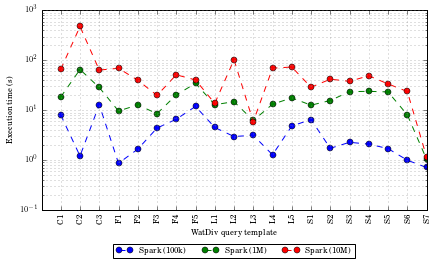

In [8]:
# Grid lines


# Grid lines
#plt.figure(figsize=(20,10))

spark_1, = plt.semilogy(range(1, averages_1.index.shape[0]+1), averages_1["time"], '--o')
spark_2, = plt.semilogy(range(1, averages_2.index.shape[0]+1), averages_2["time"], '--o')
spark_3, = plt.semilogy(range(1, averages_3.index.shape[0]+1), averages_3["time"], '--o')

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query template")
plt.xticks(range(1, averages_1.index.shape[0]+1), averages_1.index, rotation="vertical")
plt.grid(True, which="both", color="gray")

legend = plt.legend([spark_1,spark_2, spark_3], 
                    ["Spark (100k)", "Spark (1M)", "Spark (10M)"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.savefig("line_plot_hex_2c.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

In [10]:
latexify(columns=1)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


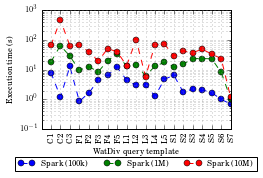

In [11]:
spark_1, = plt.semilogy(range(1, averages_1.index.shape[0]+1), averages_1["time"], '--o')
spark_2, = plt.semilogy(range(1, averages_2.index.shape[0]+1), averages_2["time"], '--o')
spark_3, = plt.semilogy(range(1, averages_3.index.shape[0]+1), averages_3["time"], '--o')

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query template")
plt.xticks(range(1, averages_1.index.shape[0]+1), averages_1.index, rotation="vertical")
plt.grid(True, which="both", color="gray")

legend = plt.legend([spark_1,spark_2, spark_3], 
                    ["Spark (100k)", "Spark (1M)", "Spark (10M)"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.savefig("line_plot_hex_1c.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

In [12]:
latexify(columns=2)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


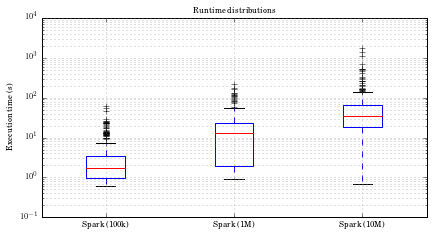

In [13]:
#ax = results_impala_100K["sec"].plot.box(return_type="axes")
temp = pd.DataFrame()
temp["spark_1"] = results_1["time"]
temp["spark_2"] = results_2["time"]
temp["spark_3"] = results_3["time"]

#plt.boxplot(temp)
temp.plot.box()
plt.yscale('log')
plt.xticks(range(1, 4), ["Spark (100k)", "Spark (1M)", "Spark (10M)"])



#plt.boxplot(results_impala_100K["secs"])
plt.grid(True, which="both", color="gray")
plt.ylabel("Execution time (s)")
plt.xlabel("Runtime distributions")
plt.gca().xaxis.set_label_position('top') 

plt.savefig("boxplot_hex.pdf")

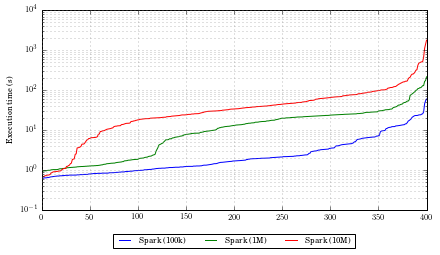

In [14]:
# Grid lines
plt.figure()

sorted_results_1 = results_1.sort_values(["time"])
sorted_results_2 = results_2.sort_values(["time"])
sorted_results_3 = results_3.sort_values(["time"])

spark_1, = plt.semilogy(range(1, sorted_results_1.index.shape[0]+1), sorted_results_1["time"], '-')
spark_2, = plt.semilogy(range(1, sorted_results_2.index.shape[0]+1), sorted_results_2["time"], '-')
spark_3, = plt.semilogy(range(1, sorted_results_3.index.shape[0]+1), sorted_results_3["time"], '-')

plt.ylabel("Execution time (s)")
plt.grid(True, which="both", color="gray")

legend = plt.legend([spark_1, spark_2, spark_3], 
                    ["Spark (100k)", "Spark (1M)", "Spark (10M)"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig("line_plot_2_hex.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

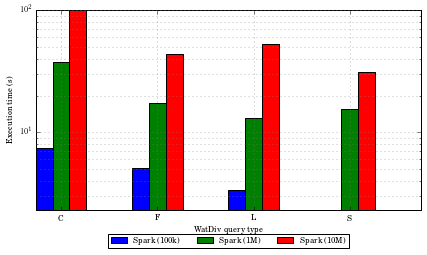

In [16]:
fig, ax = plt.subplots()

ind = np.arange(averages_class_1.index.shape[0])  # the x locations for the groups
width = 7/40                                  # the width of the bars
#width= 0.35

prop_iter = iter(plt.rcParams['axes.prop_cycle'])
spark_1 = ax.bar(ind,           averages_class_1.time, width, log=True, color=next(prop_iter)['color'])
spark_2 = ax.bar(ind + width,   averages_class_2.time, width, log=True, color=next(prop_iter)['color'])
spark_3 = ax.bar(ind + 2*width, averages_class_3.time, width, log=True, color=next(prop_iter)['color'])

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query type")
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(averages_class_1.index)
ax.set_ylim(0,100)
plt.grid(True, which="both", color="gray")

legend = plt.legend([spark_1, spark_2, spark_3], 
                    ["Spark (100k)", "Spark (1M)", "Spark (10M)"],
                    loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.savefig("barplot_hex.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
#plt.show()

In [5]:
# Boxplot
results_spark_100K = pd.read_csv("output_time_spark_100k.log", names=["query", "time"])
results_impala_100K = pd.read_csv("output_time_impala_100k.log", names=["query", "time"])

In [6]:
results_spark_100K.head(n=5)

,query,time
0,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:24.14
1,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:02.36
2,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:42.21
3,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:01.86
4,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:17.33


In [7]:
results_impala_100K.head(n=5)

,query,time
0,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:51.76
1,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:13.45
2,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,22:33.87
3,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:11.33
4,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:17.25


In [8]:
results_impala_100K['t'] = results_impala_100K.time.apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_impala_100K['td'] = results_impala_100K.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_impala_100K['sec'] = results_impala_100K['td'].apply(lambda x: x / np.timedelta64(1, 's'))

In [9]:
results_spark_100K['t'] = results_spark_100K.time.apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_spark_100K['td'] = results_spark_100K.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_spark_100K['sec'] = results_spark_100K['td'].apply(lambda x: x / np.timedelta64(1, 's'))

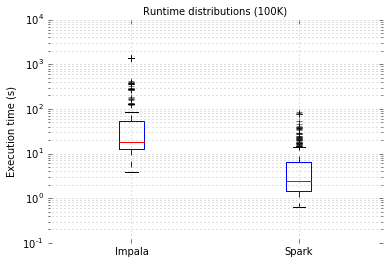

In [10]:
#ax = results_impala_100K["sec"].plot.box(return_type="axes")
temp = pd.DataFrame()
temp["impala"] = results_impala_100K["sec"]
temp["spark"] =  results_spark_100K["sec"]
#plt.boxplot(temp)
temp.plot.box()
plt.yscale('log')
plt.xticks(range(1, 3), ["Impala", "Spark"])

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

#plt.boxplot(results_impala_100K["secs"])
plt.grid(True, which="both", color="gray")
plt.ylabel("Execution time (s)")
plt.xlabel("Runtime distributions (100K)")
plt.gca().xaxis.set_label_position('top') 

plt.savefig("boxplot.eps")

In [14]:
# Sorted per type of query
results_impala_100K["query"].str.contains("C")
results_impala_100K["query"].str.contains("L")
results_impala_100K["query"].str.contains("F")



0      False
1      False
2      False
3       True
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23      True
24      True
25      True
26      True
27      True
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283     True
284     True
285     True
286     True
287     True
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Name: query, dtype: bool

In [ ]:
# Sorted per execution time